In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.fugure_format = 'retina'

%load_ext autoreload

/home/semyon/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


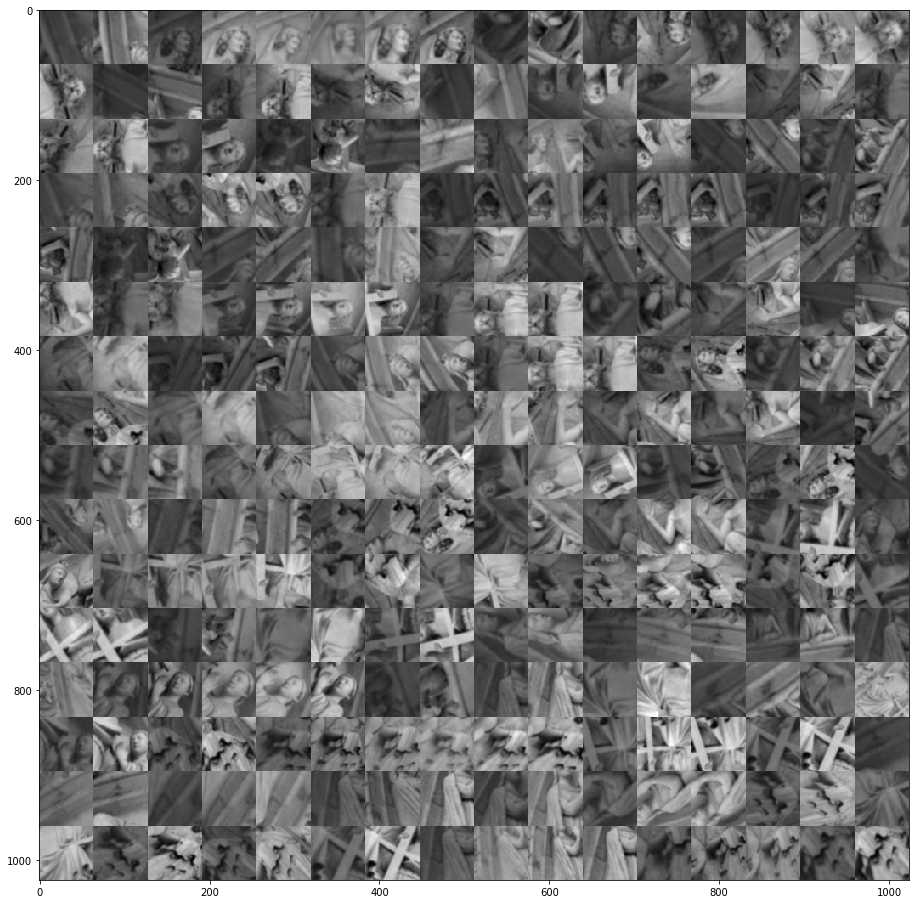

In [2]:
%autoreload
from utils import read_bitmap, read_patch, cut_patch_from_bitmap

DATA_ROOT = '../data'
NOTREDAME = f'{DATA_ROOT}/notredame'
LIBERTY = f'{DATA_ROOT}/liberty'

bmp = read_bitmap(NOTREDAME, 0)
plt.figure(figsize=(16, 16))
plt.imshow(bmp, shape=(16, 16), cmap='gray');

In [3]:
cut_patch_from_bitmap(bmp, 12).shape

(64, 64)

In [4]:
info_file = pd.read_csv(f'{NOTREDAME}/info.txt', delimiter=' ', names=['patch_id', 'unused'])
info_file[10:16]

,patch_id,unused
10,3,0
11,3,0
12,4,0
13,4,0
14,4,0
15,4,0


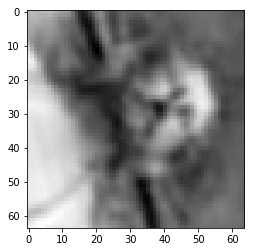

In [5]:
plt.imshow(read_patch(NOTREDAME, 12), cmap='gray');

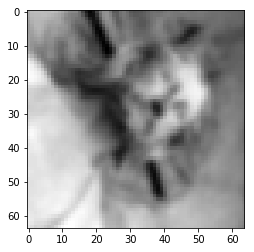

In [6]:
plt.imshow(read_patch(NOTREDAME, 13), cmap='gray');

In [7]:
match_file = pd.read_csv(f'{NOTREDAME}/m50_50000_50000_0.txt', delimiter=' ', 
    names=['patchID1', '3DpointID1', 'unused1', 'patchID2','3DpointID2', 'unused2', 'unused3'])
match_file.head()

,patchID1,3DpointID1,unused1,patchID2,3DpointID2,unused2,unused3
0,130856,39583,0,217903,67429,0,0
1,451659,142159,0,451660,142159,0,0
2,33399,10806,0,397913,125276,0,0
3,195398,60480,0,255973,77894,0,0
4,38293,12062,0,69767,20959,0,0


In [8]:
match_file = match_file.sample(frac=1)
match_file.head()

,patchID1,3DpointID1,unused1,patchID2,3DpointID2,unused2,unused3
1863,425163,133356,0,425164,133356,0,0
38580,309269,94633,0,309271,94633,0,0
27223,455716,143359,0,455717,143359,0,0
30909,413192,129788,0,413193,129788,0,0
35222,463102,145853,0,463103,145853,0,0


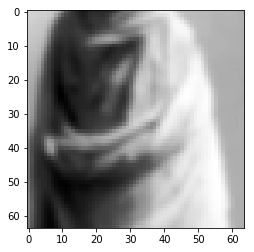

In [36]:
patch = read_patch(LIBERTY, 13)
plt.imshow(patch, cmap='gray');

In [37]:
patch

array([[209, 208, 208, ..., 181, 179, 178],
       [207, 207, 206, ..., 182, 180, 179],
       [206, 205, 204, ..., 182, 181, 180],
       ...,
       [138, 108,  84, ..., 180, 179, 179],
       [136, 106,  84, ..., 181, 179, 179],
       [134, 104,  82, ..., 181, 179, 179]], dtype=uint8)

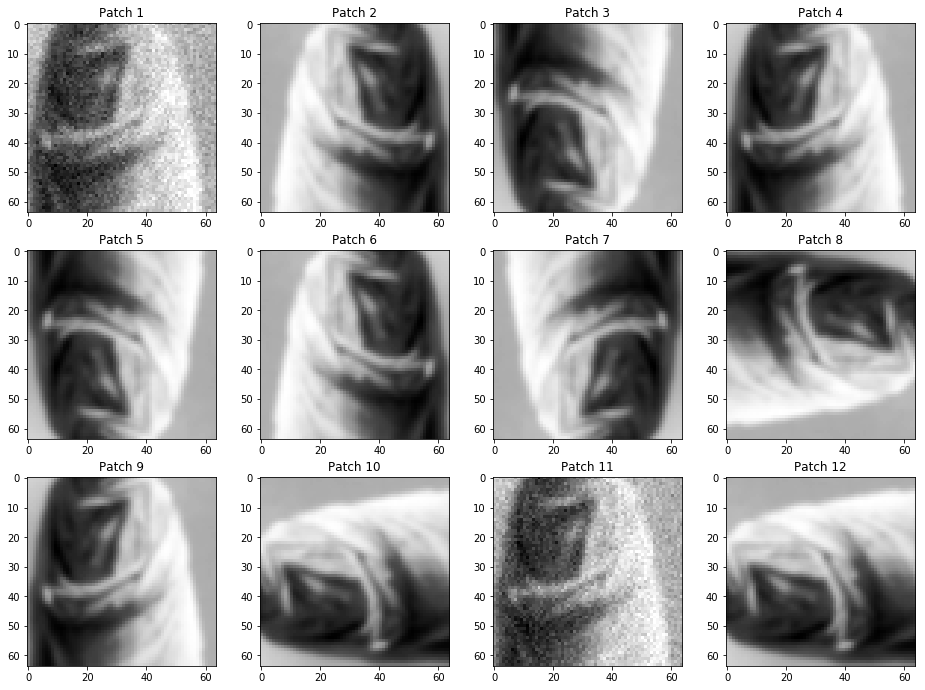

In [38]:
from imgaug import augmenters as iaa
from utils import show_images

aug = iaa.OneOf([
    iaa.Fliplr(p=1.0),
    iaa.Flipud(p=1.0),
    iaa.Affine(rotate=(90)),
    iaa.Affine(rotate=(180)),
    iaa.Affine(rotate=(270)),
    iaa.Noop(),
    iaa.AdditiveGaussianNoise(scale=0.05 * 255)
])

patches = [patch] * 12
augmented = aug.augment_images(patches)

show_images(augmented, 4)

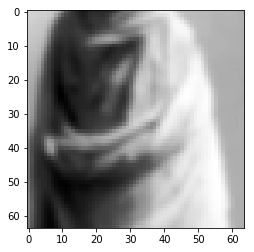

In [12]:
plt.imshow(patch / 255, cmap='gray');

In [13]:
import os

TEXTS = f'{DATA_ROOT}/texts'
image_files = os.listdir(TEXTS)
print(image_files[:10], len(image_files))

['800.png', '632.png', '43.png', '216.png', '621.png', '311.png', '570.png', '432.png', '924.png', '749.png'] 973


In [14]:
import cv2
import imgaug as ia
from imgaug import augmenters as iaa

sift = cv2.xfeatures2d.SIFT_create(100)

In [51]:
IMAGE_FILE = f'{TEXTS}/800.png'

img = read_image(IMAGE_FILE)
sift_kps = sift.detect(img)

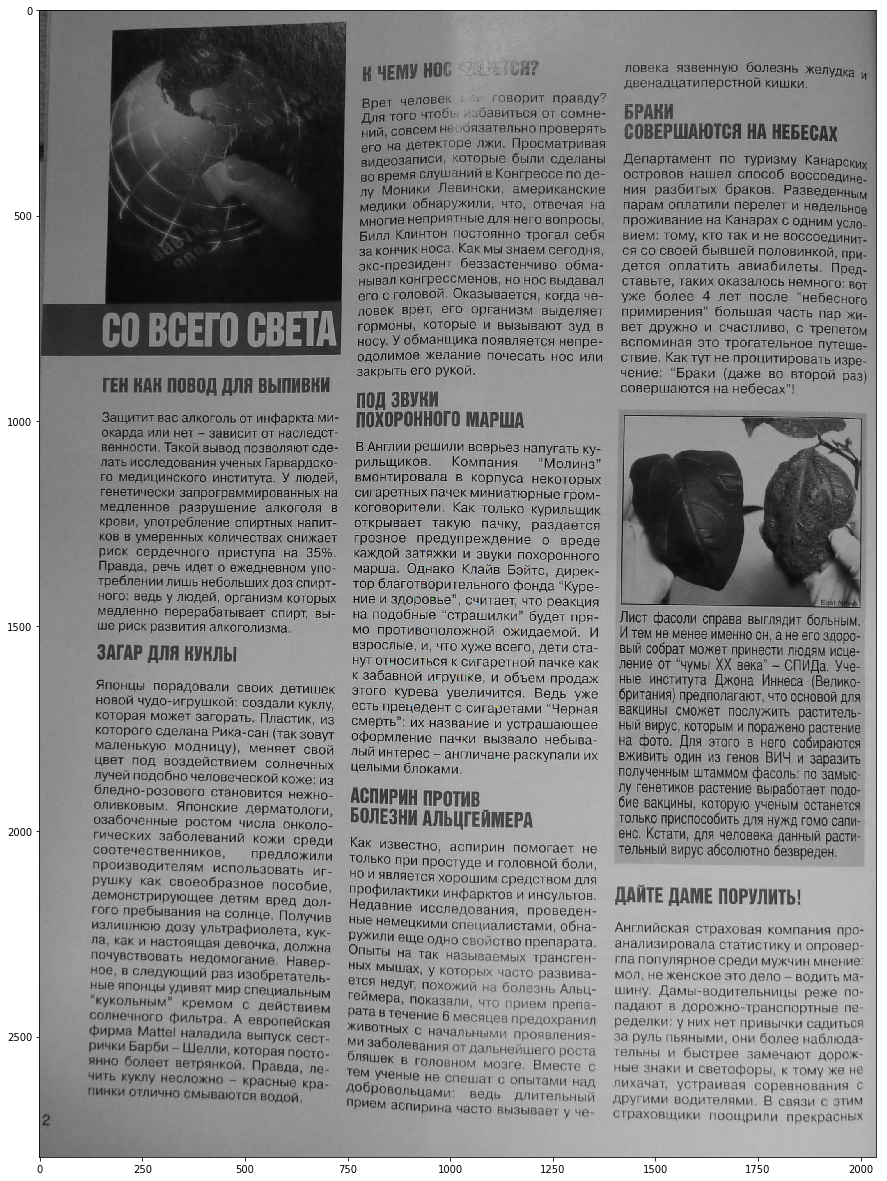

In [52]:
img_with_kps = cv2.drawKeypoints(img, sift_kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15, 25))
plt.imshow(img_with_kps);
plt.show()

In [ ]:
#aug = iaa.GaussianBlur(sigma=10.0)
aug = iaa.AdditiveGaussianNoise(scale=0.06 * 255)

aug_img = aug.augment_images([img])[0]
kps = ia.KeypointsOnImage([ia.Keypoint(x=int(kp.pt[0]), y=int(kp.pt[1])) for kp in sift_kps], shape=img.shape)
aug_kps = aug.augment_keypoints([kps])[0]

plt.figure(figsize=(15, 25))
plt.imshow(aug_img, cmap='gray');
plt.show()

2.4416940212249756 (64, 64)


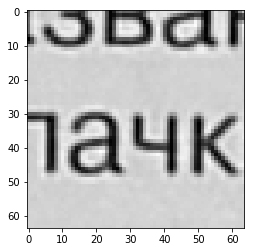

In [48]:
%autoreload
from utils import read_keypoint_patch

i = np.random.randint(100)
#i = np.argmax([k.size for k in sift_kps])

kp = sift_kps[i]
patch = read_keypoint_patch(IMAGE_FILE, kp.pt[0], kp.pt[1], kp.size)

plt.imshow(patch, cmap='gray');
print(kp.size, patch.shape)

In [49]:
%autoreload
from utils import create_aug_dataset

aug = iaa.AdditiveGaussianNoise(scale=0.06 * 255)

create_aug_dataset(TEXTS, f'{DATA_ROOT}/texts_gauss_noise_0.06', aug)

  0%|          | 0/973 [00:00<?, ?it/s]


error: OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11147: error: (-215) scn == 3 || scn == 4 in function cvtColor
